In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
import numpy as np
from tensorflow.image import resize
from PIL import Image
import numpy as np

.Codigo básico de lectura de números escritos a mano con CNN

El dataset mnist es un conjunto de imágenes negras con números blancos escritos a mano.Estos son los datos que usaremos para entrenar el modelo

In [3]:
# Load the dataset (grayscale)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to (28, 28, 1) to add the channel dimension (since Conv2D expects 4D input)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
# Convert labels to one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

Construimos el modelo, con una red neuronal convolucional la cuyos números son: 32:cantidad de filtros usados. 3:dimensiones del filtro (matriz 3x3), input shape son las dimensiones de la imágen y padding=same significa que la matriz de mapeo será de las mismas dimensiones que la matriz de entrada

In [4]:
#armar model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
##Dropout significa que se apaga el 20% de las neuronas para controlar el overfitting
model.add(keras.layers.BatchNormalization())
##BatchNormalization normaliza las activaciones de la capa anterior en cada batch
model.add(keras.layers.Flatten())
##Flatten convierte la matriz de entrada en un vector
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
##Dense es la capa de salida con 10 neuronas y función de activación softmax

In [5]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
#Se entrena el modelo
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=1, batch_size=64)

938/938 [==============================] - 145s 152ms/step - loss: 0.1590 - accuracy: 0.9517 - val_loss: 0.0841 - val_accuracy: 0.9726


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0841 - accuracy: 0.9726
Test accuracy: 0.972599983215332


In [14]:
#Usamos imagenes de minst
predictions = model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


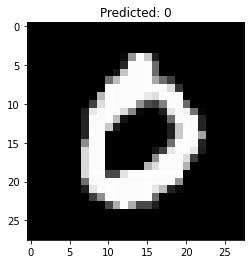

In [16]:
plt.imshow(test_images[3], cmap='gray_r')
plt.title(f'Predicted: {predictions[3].argmax()}')
plt.show()

In [11]:
#Función para preprocesar la imagen

from PIL import ImageOps

def preprocess_custom_image(image_path):
    # Cargar la imagen
    img = Image.open(image_path).convert('L')  # Convert to grayscale (L mode)
    
    # Invert the image (optional: if the background is white and the digit is black)
    img = ImageOps.invert(img)

    # Resize to 28x28 pixels
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    
  
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array

In [12]:
# Function to predict custom images
def predict_custom_image(image_path):
    img_array = preprocess_custom_image(image_path)
    
    # Predict the class
    prediction = model.predict(img_array)
    
    # Find the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)
    
    print(f"Predicted class: {predicted_class[0]}")

In [13]:
# Test with your own image
predict_custom_image('my_digit4.png')

1/1 [==============================] - 0s 220ms/step
Predicted class: 4


In [24]:
def conv2D(input_image, kernel, stride = 1, padding = 0):
    # Add padding to the input image
    if padding > 0:
        input_image = np.pad(input_image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Dimensions of input image and kernel
    input_height, input_width = input_image.shape
    kernel_height, kernel_width = kernel.shape
    # Calculate output dimensions
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1
    # Initialize the output feature map
    output = np.zeros((output_height, output_width))
        # Perform the convolution operation
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Extract the patch of the image
            patch = input_image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width]

            # Perform element-wise multiplication and sum the result
            output[y, x] = np.sum(patch * kernel)

    return output

array([[5.66252846e-01, 8.72088546e-01, 5.69375517e-01, 7.23899648e-01,
        1.98322393e-01, 4.81353360e-01, 4.89850146e-01, 8.71070259e-01,
        7.22169816e-01, 5.70452355e-01, 3.89775352e-01, 3.03519658e-01,
        3.60160739e-01, 1.57142546e-01, 9.50143976e-01, 3.94707086e-01,
        1.75929431e-01, 7.65646811e-01, 5.46388305e-01, 1.54499921e-01,
        3.58413057e-02, 1.20904829e-01, 4.81826622e-01, 2.62117557e-01,
        1.35230866e-01, 3.49933497e-01, 6.09151771e-01, 5.95169023e-01],
       [1.48359902e-01, 3.86991366e-01, 8.44571348e-01, 8.30821624e-01,
        2.25302632e-03, 2.48085312e-01, 9.77557123e-01, 8.42950462e-01,
        2.84811578e-01, 5.98909701e-01, 3.42769425e-01, 7.04120535e-01,
        8.67812296e-01, 9.53045950e-01, 8.73930907e-02, 6.78592036e-01,
        7.73866777e-01, 1.88855145e-01, 4.71818476e-01, 4.89470514e-01,
        9.07668889e-02, 8.93417736e-02, 5.88603533e-01, 8.49451544e-01,
        6.32729408e-01, 8.69814021e-01, 7.70827054e-01, 3.07982